Using a local database of movies, top cast and crew, and genres, I am going to explore a dataset to see if there are any relationships between these and how much a movie can earn.


In [45]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [4]:
engine = create_engine('postgresql://benhurst@localhost:5432/movies')

To start, I will take a look at what years are in the top 1000 earning movies.


In [35]:
query = "SELECT COUNT(release_year), release_year FROM movies GROUP BY release_year ORDER BY release_year"

df = pd.read_sql_query(query, con=engine)

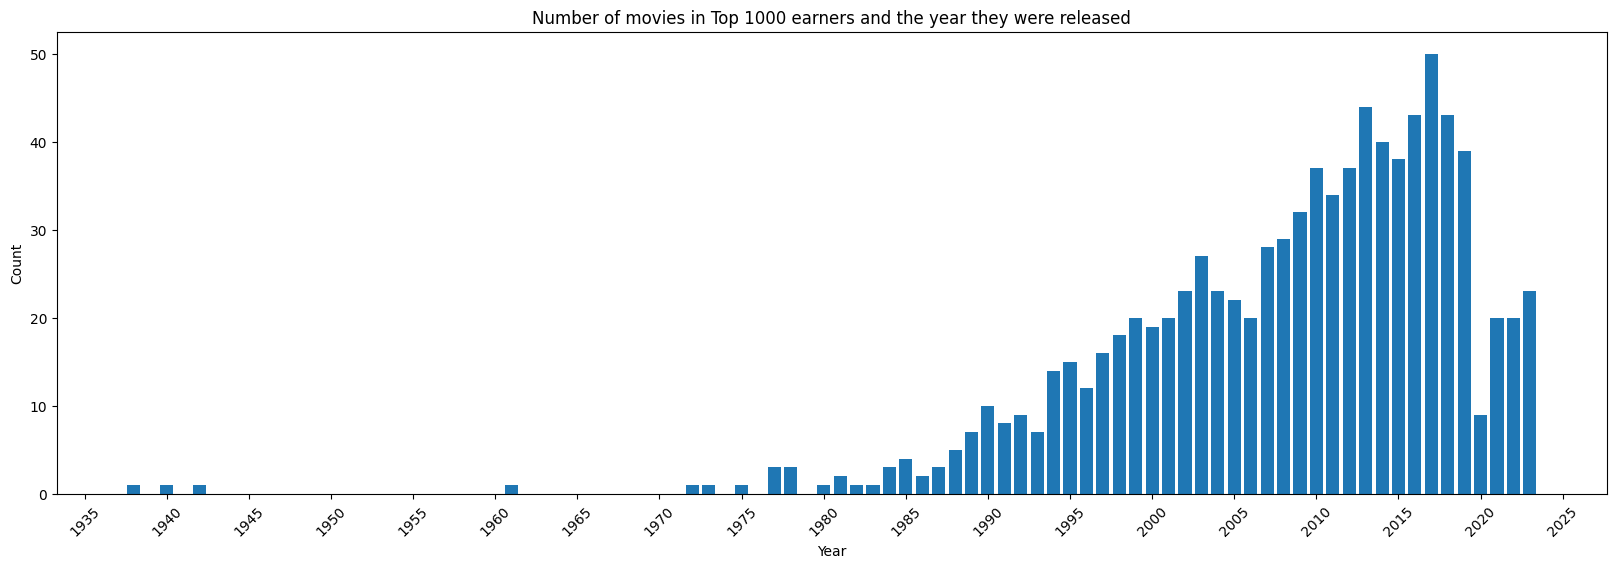

In [51]:
x = df['release_year']
y = df['count']

plt.figure(figsize=(20,6))
plt.xticks(np.arange(min(x)-3, max(x)+4, 5))
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of movies in Top 1000 earners and the year they were released')
plt.bar(x,y)
plt.show()

Here we can see that 2017 peaks as the year in the movies released which are all in the top 1000 earnings.\
I'd be interested to see the spread of these movies and the genres they are.


In [53]:
query = "SELECT COUNT(genre_id), genre FROM genres JOIN movies_genres ON genres.id = movies_genres.genre_id GROUP BY genre"

df = pd.read_sql_query(query, con=engine)

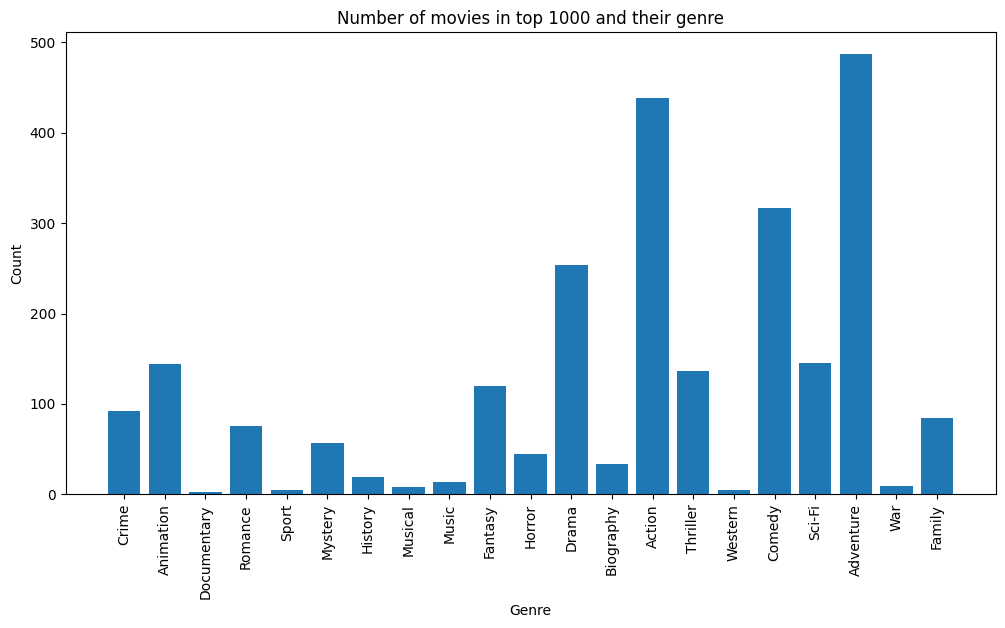

In [66]:
x = df['genre']
y = df['count']

plt.figure(figsize=(12,6))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of movies in top 1000 and their genre')
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [84]:
query = "SELECT release_year, genres.genre FROM movies JOIN movies_genres ON movies.id = movies_genres.movie_id JOIN genres ON movies_genres.genre_id = genres.id ORDER BY release_year"

df = pd.read_sql_query(query, con=engine)

In [110]:
query = "SELECT name, COUNT(movies_persons.person_id) FROM persons JOIN movies_persons ON persons.id = movies_persons.person_id GROUP BY name ORDER BY count"

df = pd.read_sql_query(query, con=engine)

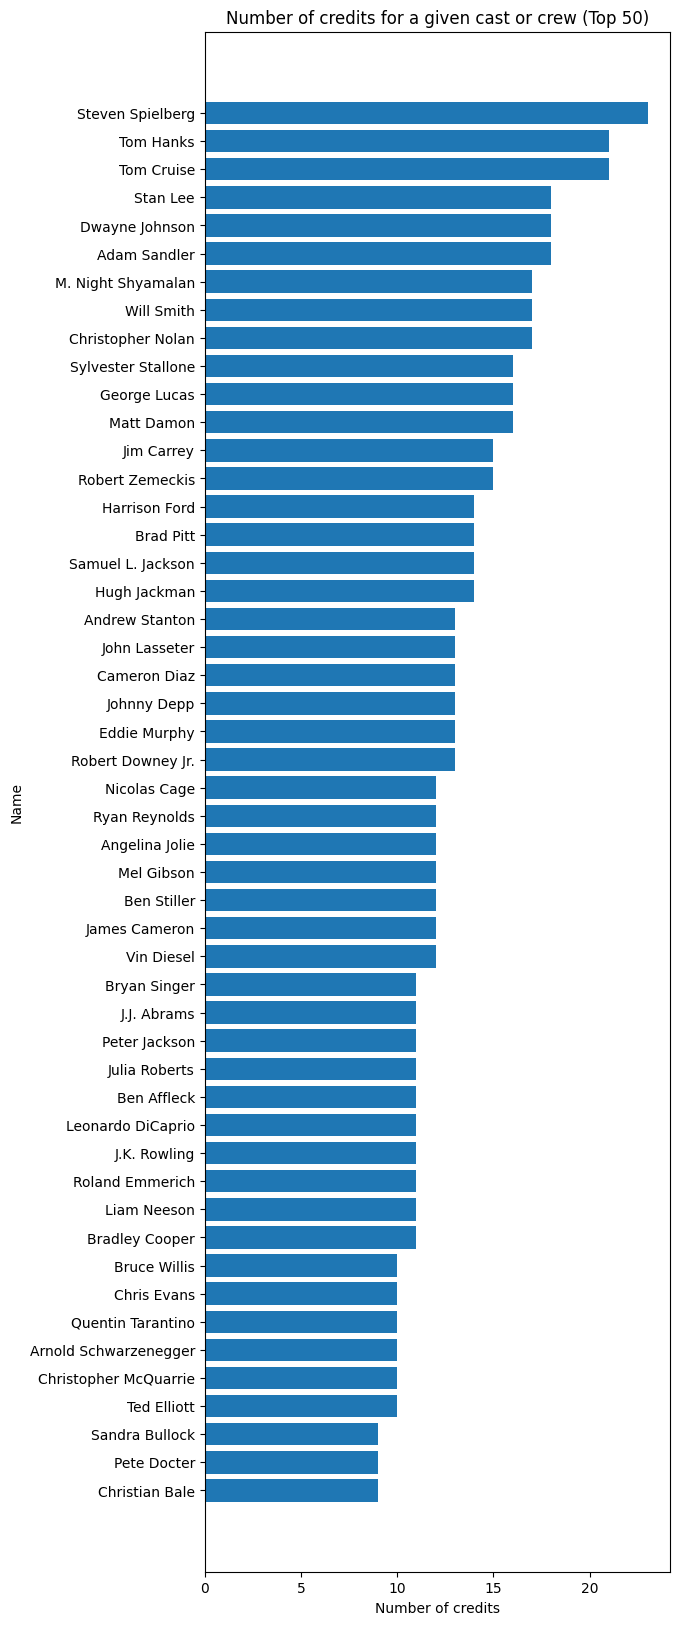

In [116]:
x = df.tail(50)['name']
y = df.tail(50)['count']

plt.figure(figsize=(6,20))
plt.barh(x,y)
plt.ylabel('Name')
plt.xlabel('Number of credits')
plt.title('Number of credits for a given cast or crew (Top 50)')
plt.show()